<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 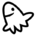 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [328]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.19.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.19.6 which is incompatible.


In [329]:
pip install deepdriver==0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-4.21.12-cp37-abi3-manylinux2014_x86_64.whl (409 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.


In [330]:
pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.57.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.2

#1. ➕ import deepdriver & deeplearnig framework



In [331]:
import tensorflow as tf

In [332]:
import deepdriver

#2. prepare dataset

In [333]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-12-19 08:26:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   147MB/s    in 0.4s    

2022-12-19 08:26:07 (147 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [334]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [335]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [336]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =int(total_data_count*0.8)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [337]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [338]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 800
Total training dog images : 800
Total validation cat images : 100
Total validation dog images : 100
Total test cat images : 100
Total test dog images : 100


#2. ⚙ deepdriver server setting

In [339]:
deepdriver.setting(http_host="quick-experience.bokchi.com:9011" ,grpc_host="quick-experience.bokchi.com:19051")

#3. 🔌 log in to deepdriver

In [340]:
deepdriver.login(key="OWFkMmQyMjA1N2UyM2ViZjBiZmYxNjQ3ODQ5ZDAxYmRlNTBhMmFiZWJhZDAxNTQ5M2MyMDc0ZWJhNGY3NWI1ZQ==")

True

#4. 🥼 create experiment and run

In [341]:
experiment_name="exp_cat_dog_cnn_2"

In [342]:
artifact_name ="cat_dog_cnn_model"

In [343]:
# experiment init & config hyperparam
deepdriver.init(exp_name= experiment_name, 
                config={ 'architecture':"CNN", 'epoch': 10, 'batch_size': 64, 'hidden_layer':512, 'learning_rate': 0.001})

2022-12-19 08:26:10,751 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn_2
Run Name=run-3
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn_2/run-3/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn_2
Run Name=run-3
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn_2/run-3/run/chart


#5. 📚 train your code and send log

make model

In [344]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(deepdriver.config.hidden_layer, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 17, 17, 64)     

In [345]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=deepdriver.config.learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


data load

In [346]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                  batch_size=deepdriver.config.batch_size,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


add deepdriver.log() in train function

In [347]:
class CustomCallback(tf.keras.callbacks.Callback):

    # def on_train_end(self, logs=None):
    #     keys = list(logs.keys())
    #     deepdriver.finish()

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        #deepdriver.log(logs)


train model

In [348]:
steps_per_epoch = train_generator.n//deepdriver.config.batch_size

In [349]:
validation_steps = validation_generator.n//deepdriver.config.batch_size

In [350]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)

Epoch 1/10
25/25 - 8s - loss: 0.8816 - accuracy: 0.5269 - val_loss: 0.6735 - val_accuracy: 0.5573 - 8s/epoch - 327ms/step
Epoch 2/10
25/25 - 5s - loss: 0.6983 - accuracy: 0.6000 - val_loss: 0.6278 - val_accuracy: 0.6927 - 5s/epoch - 202ms/step
Epoch 3/10
25/25 - 5s - loss: 0.6640 - accuracy: 0.6281 - val_loss: 0.6106 - val_accuracy: 0.7031 - 5s/epoch - 200ms/step
Epoch 4/10
25/25 - 5s - loss: 0.5750 - accuracy: 0.6925 - val_loss: 0.5496 - val_accuracy: 0.7292 - 5s/epoch - 200ms/step
Epoch 5/10
25/25 - 5s - loss: 0.5150 - accuracy: 0.7669 - val_loss: 0.5520 - val_accuracy: 0.7135 - 5s/epoch - 201ms/step
Epoch 6/10
25/25 - 5s - loss: 0.5053 - accuracy: 0.7600 - val_loss: 0.7238 - val_accuracy: 0.6406 - 5s/epoch - 201ms/step
Epoch 7/10
25/25 - 5s - loss: 0.4133 - accuracy: 0.8213 - val_loss: 0.5616 - val_accuracy: 0.7552 - 5s/epoch - 198ms/step
Epoch 8/10
25/25 - 6s - loss: 0.3437 - accuracy: 0.8506 - val_loss: 0.5683 - val_accuracy: 0.6667 - 6s/epoch - 247ms/step
Epoch 9/10
25/25 - 5s - 

In [351]:
model.save(model_dir+"/cat_dog_cnn_model")

#6. ⬆ upload artifact(Model)

In [352]:
arti = deepdriver.Artifacts(name=artifact_name,type="model")

In [353]:
arti.add(model_dir+"/cat_dog_cnn_model")

In [354]:
[(ent.path , ent.digest) for ent in arti.entry_list]

[('variables/variables.data-00000-of-00001',
  '15413d681dc0f18323e506383d39f29e'),
 ('variables/variables.index', 'd7ddafc12e3da96670b8a3dfffb2d17e'),
 ('saved_model.pb', '8db8727ec7e828a5d68e79d9e841d092'),
 ('keras_metadata.pb', 'adce46bb75818f2a5a404e31581f81c0')]

In [355]:
arti.upload()

Uploading: [./model/cat_dog_cnn_model/keras_metadata.pb] |██████████████████████████████| [100.0%] [4/4]

True

In [356]:
deepdriver.finish()

True

#7. ⬇ create another run & download artifact(Model)

In [357]:
# experiment init & config hyperparam
deepdriver.init(exp_name= experiment_name, 
                config={ 'architecture':"CNN", 'epoch': 10, 'batch_size': 64, 'hidden_layer':512, 'learning_rate': 0.001})

2022-12-19 08:27:41,035 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn_2
Run Name=run-4
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn_2/run-4/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn_2
Run Name=run-4
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn_2/run-4/run/chart


In [358]:
arti2 = deepdriver.get_artifact(name=artifact_name,type="model")

2022-12-19 08:27:41,822 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{14}


INFO:deepdriver:artifact is got! 
 artifact id :{14}


In [359]:
[(ent.path , ent.digest) for ent in arti2.entry_list]

[('keras_metadata.pb', 'adce46bb75818f2a5a404e31581f81c0'),
 ('saved_model.pb', '8db8727ec7e828a5d68e79d9e841d092'),
 ('variables/variables.data-00000-of-00001',
  '15413d681dc0f18323e506383d39f29e'),
 ('variables/variables.index', 'd7ddafc12e3da96670b8a3dfffb2d17e')]

In [360]:
arti2.download()

Downloading: [./deepdriver/artifact/14/V1/variables/variables.index] |██████████████████████████████| [100.0%] [4/4]

'./deepdriver/artifact/14'

#8. model re-train & upload model with another version

In [361]:
reload_model = tf.keras.models.load_model(arti2.get_download_dir())

In [362]:
history = reload_model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)

Epoch 1/10
25/25 - 6s - loss: 0.3743 - accuracy: 0.8750 - val_loss: 0.7472 - val_accuracy: 0.6615 - 6s/epoch - 242ms/step
Epoch 2/10
25/25 - 5s - loss: 0.1615 - accuracy: 0.9381 - val_loss: 0.9581 - val_accuracy: 0.6979 - 5s/epoch - 199ms/step
Epoch 3/10
25/25 - 6s - loss: 0.1372 - accuracy: 0.9513 - val_loss: 0.8982 - val_accuracy: 0.7031 - 6s/epoch - 224ms/step
Epoch 4/10
25/25 - 5s - loss: 0.1376 - accuracy: 0.9531 - val_loss: 0.9871 - val_accuracy: 0.6979 - 5s/epoch - 198ms/step
Epoch 5/10
25/25 - 5s - loss: 0.1111 - accuracy: 0.9650 - val_loss: 0.9548 - val_accuracy: 0.6667 - 5s/epoch - 198ms/step
Epoch 6/10
25/25 - 5s - loss: 0.0606 - accuracy: 0.9775 - val_loss: 1.1600 - val_accuracy: 0.6823 - 5s/epoch - 197ms/step
Epoch 7/10
25/25 - 5s - loss: 0.0710 - accuracy: 0.9737 - val_loss: 1.6838 - val_accuracy: 0.6615 - 5s/epoch - 197ms/step
Epoch 8/10
25/25 - 5s - loss: 0.1259 - accuracy: 0.9638 - val_loss: 1.0298 - val_accuracy: 0.6354 - 5s/epoch - 197ms/step
Epoch 9/10
25/25 - 5s - 

In [363]:
reload_model.save(model_dir+"/cat_dog_cnn_model2")

In [364]:
arti = deepdriver.get_artifact(name=artifact_name,type="model")

2022-12-19 08:28:41,094 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{14}


INFO:deepdriver:artifact is got! 
 artifact id :{14}


In [365]:
arti.add(model_dir+"/cat_dog_cnn_model2")

In [366]:
[(ent.path ,ent.status, ent.digest) for ent in arti.entry_list]

[('keras_metadata.pb', 'SYNC', '22bda5c70d05936de8dbf9ad9f28c637'),
 ('saved_model.pb', 'SYNC', '844f7712ca091e55bd7bcbdf007064f3'),
 ('variables/variables.data-00000-of-00001',
  'SYNC',
  '7e01e195553d66520f1164c70c63064b'),
 ('variables/variables.index', 'SYNC', '26dd72c632029369238ae2fd13f9527a')]

In [367]:
arti.upload()

Uploading: [./model/cat_dog_cnn_model2/variables/variables.index] |██████████████████████████████| [100.0%] [4/4]

True

In [368]:
deepdriver.finish()

True